Friedman test:
Statistic = 38.4667, p-value = 0.0000

Applying Nemenyi post-hoc test...

Nemenyi p-values:
                RF       SVM       KNN        LR           LDA
RF   1.000000e+00  0.101613  0.052336  0.000033  1.340922e-07
SVM  1.016133e-01  1.000000  0.999024  0.181599  1.095116e-02
KNN  5.233591e-02  0.999024  1.000000  0.297889  2.488351e-02
LR   3.306047e-05  0.181599  0.297889  1.000000  8.402234e-01
LDA  1.340922e-07  0.010951  0.024884  0.840223  1.000000e+00


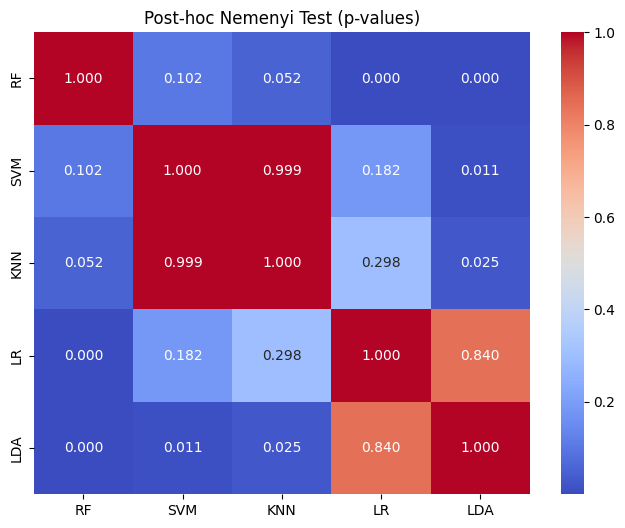

In [20]:
import pandas as pd
import scikit_posthocs as sp
from scipy.stats import friedmanchisquare
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'RF':  [0.846, 0.850, 0.816, 0.823, 0.712, 0.719, 0.534, 0.537, 0.707, 0.710, 0.636, 0.639],
    'SVM': [0.694, 0.796, 0.570, 0.729, 0.614, 0.675, 0.429, 0.496, 0.677, 0.669, 0.592, 0.580],
    'KNN': [0.790, 0.791, 0.740, 0.741, 0.649, 0.653, 0.455, 0.447, 0.686, 0.572, 0.603, 0.452],
    'LR':  [0.485, 0.537, 0.423, 0.459, 0.423, 0.485, 0.279, 0.327, 0.615, 0.618, 0.520, 0.518],
    'LDA': [0.471, 0.519, 0.393, 0.429, 0.427, 0.488, 0.269, 0.318, 0.604, 0.606, 0.508, 0.502]
}

experiments = [
    'DB2 5G 3F', 'DB2 5G 9F', 'DB2 10G 3F', 'DB2 10G 9F',
    'DB3 5G 3F', 'DB3 5G 9F', 'DB3 10G 3F', 'DB3 10G 9F',
    'DB5 5G 3F', 'DB5 5G 9F', 'DB5 10G 3F', 'DB5 10G 9F'
]

df = pd.DataFrame(data, index=experiments)

# === Teste de Friedman ===
stat, p = friedmanchisquare(df['RF'], df['SVM'], df['KNN'], df['LR'], df['LDA'])
print("Friedman test:")
print(f"Statistic = {stat:.4f}, p-value = {p:.4f}")


if p < 0.05:
    print("\nApplying Nemenyi post-hoc test...")
    nemenyi = sp.posthoc_nemenyi_friedman(df)
    print("\nNemenyi p-values:\n", nemenyi)

    
    plt.figure(figsize=(8, 6))
    sns.heatmap(nemenyi, annot=True, cmap="coolwarm", fmt=".3f")
    plt.title("Post-hoc Nemenyi Test (p-values)")
    plt.show()
else:
    print("\nNo statistically significant differences were found between models.")





C:\Users\PC\AppData\Local\Temp\ipykernel_3272\1135261869.py:31: OrangeDeprecationWarning: compute_CD is deprecated and will be removed in Orange 3.34.
  cd = scoring.compute_CD(avg_ranks, n=len(accuracies), alpha='0.05')
C:\Users\PC\AppData\Local\Temp\ipykernel_3272\1135261869.py:33: OrangeDeprecationWarning: graph_ranks is deprecated and will be removed in Orange 3.34.
  scoring.graph_ranks(avg_ranks, names, cd=cd, width=6)
C:\Users\PC\AppData\Local\Temp\ipykernel_3272\1135261869.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 800x300 with 0 Axes>

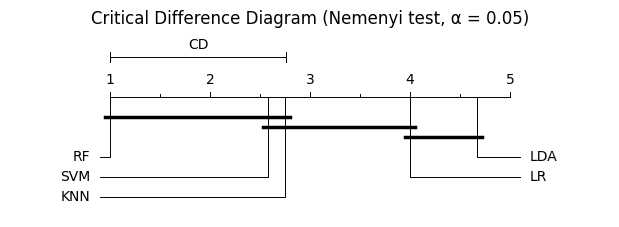

In [ ]:
import numpy as np
from scipy.stats import rankdata
import matplotlib.pyplot as plt
from Orange.evaluation import scoring


accuracies = [
    [0.846, 0.694, 0.790, 0.485, 0.471],
    [0.850, 0.796, 0.791, 0.537, 0.519],
    [0.816, 0.570, 0.740, 0.423, 0.393],
    [0.823, 0.729, 0.741, 0.459, 0.429],
    [0.712, 0.614, 0.649, 0.423, 0.427],
    [0.719, 0.675, 0.653, 0.485, 0.488],
    [0.534, 0.429, 0.455, 0.279, 0.269],
    [0.537, 0.496, 0.447, 0.327, 0.318],
    [0.707, 0.677, 0.686, 0.615, 0.604],
    [0.710, 0.669, 0.572, 0.618, 0.606],
    [0.636, 0.592, 0.603, 0.520, 0.508],
    [0.639, 0.580, 0.452, 0.518, 0.502],
]

ranks = [rankdata([-x for x in row], method="average") for row in accuracies]
ranks = np.array(ranks)


avg_ranks = np.mean(ranks, axis=0)
names = ['RF', 'SVM', 'KNN', 'LR', 'LDA']

cd = scoring.compute_CD(avg_ranks, n=len(accuracies), alpha='0.05')
plt.figure(figsize=(8, 3))
scoring.graph_ranks(avg_ranks, names, cd=cd, width=6)
plt.title("Critical Difference Diagram (Nemenyi test, α = 0.05)")
plt.tight_layout()
plt.savefig("cd_diagram_final.pdf", format="pdf", bbox_inches="tight")
plt.show()
